<a href="https://colab.research.google.com/github/CharanReddy23/Landingpage/blob/main/Superstore_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [8]:
df = pd.read_csv('/content/SampleSuperstore.csv', encoding='latin1')


In [9]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
# Basic info
df.info()

# Check missing values
df.isnull().sum()

# Drop missing rows if any
df.dropna(inplace=True)

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create new 'Month' column
df['Month'] = df['Order Date'].dt.to_period('M')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
df.groupby('Month')['Profit'].sum().sort_values(ascending=False)


,Profit
Month,
2016-12,17885.3093
2016-10,16243.1425
2017-03,14751.8915
2015-11,12474.7884
2017-09,10991.5556
2015-03,9732.0978
2017-11,9690.1037
2016-09,9328.6576
2014-11,9292.1269


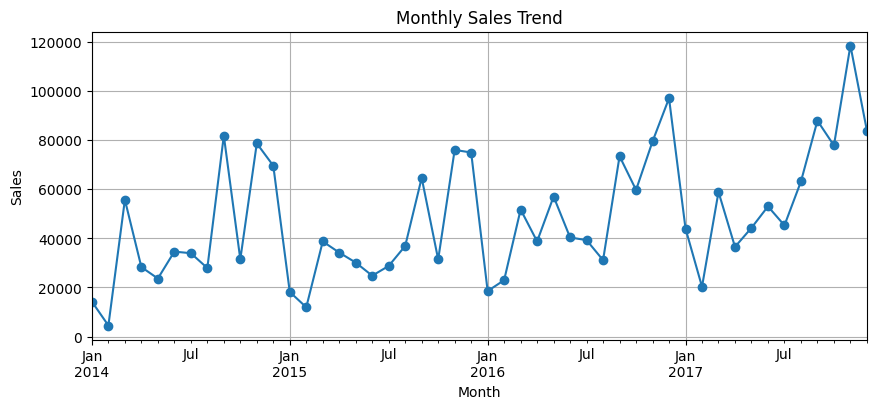

In [12]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', figsize=(10,4))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [13]:
df.groupby('Category')['Discount'].mean()


,Discount
Category,
Furniture,0.173923
Office Supplies,0.157285
Technology,0.132323


In [14]:
df.groupby('Region')[['Sales', 'Profit']].sum()


,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


In [15]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)


,Sales
Sub-Category,
Phones,330007.054
Chairs,328449.103
Storage,223843.608
Tables,206965.532
Binders,203412.733
